<a href="https://colab.research.google.com/github/CiciWang1230/BHFinalProject/blob/main/BHFinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import math

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"128de4248c745e040927ee558a9bcd62"} #this is my (Jack) API key btw

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

r = get(baseUrl)
r.keys()
names = [sim['name'] for sim in r['simulations']]

#defining the "sim" function for TNG100-1
i = names.index('TNG300-1')
sim = get( r['simulations'][i]['url'])



In [57]:
#defining redshift values we are testing, etc
redshifts = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
sfrData = []
fractSubhalosUsed = 1.0

In [58]:
snaps = get(sim['url'] + 'snapshots/')

#Looping through all the snapshots to find the exact snapshots corresponding to the redshifts we're sampling
l=0
#redshifts with intervals of 0.5
snapz_00 = 0
snapz_05 = 0
snapz_10 = 0
snapz_15 = 0
snapz_20 = 0
snapz_25 = 0
snapz_30 = 0
snapz_35 = 0
snapz_40 = 0
snapz_45 = 0
snapz_50 = 0
snapz_55 = 0
snapz_60 = 0



#function for the ones in intervals of 0.5
while l < len(snaps):
  lval = float("{:.1f}".format(snaps[l]['redshift']))
  if lval == 0.0:
    snapz_00 = l
  elif lval == 0.5:
    snapz_05 = l
  elif lval == 1.0:
    snapz_10 = l
  elif lval == 1.5:
    snapz_15 = l
  elif lval == 2.0:
    snapz_20 = l
  elif lval == 2.5:
    snapz_25 = l
  elif lval == 3.0:
    snapz_30 = l
  elif lval == 3.5:
    snapz_35 = l
  elif lval == 4.0:
    snapz_40 = l
  elif lval == 4.5:
    snapz_45 = l
  elif lval == 5.0:
    snapz_50 = l
  elif lval == 5.5:
    snapz_55 = l
  elif lval == 6.0:
    snapz_60 = l
  l = l+1



  snapzlist = [snapz_00, snapz_05, snapz_10, snapz_15, snapz_20, snapz_25, snapz_30, snapz_35, snapz_40, snapz_45, snapz_50, snapz_55, snapz_60]

In [59]:
#parameters for the search
params = {'limit': 100, 'order_by': '-mass_stars'}

#this returns a list of subhalos for a given redshift (input value), for bulk data retrieval
def subhalos(z):
  x = int(2*z)
  subhalos_url = snaps[snapzlist[x]]['url'] + 'subhalos/'
  return get(subhalos_url, params)

#function to pick a sample of subhalos using the above function, also for bulk data retrieval; fix
def pickSampledSubs(z):
  #subhalo_list = subhalos(z)['results']
  #sampledSubs = np.random.choice(subhalo_list, size=int(len(subhalo_list)*fractSubhalosUsed), replace=False)
  subhalo_list = subhalos(z)['results']
  sampledSubs = subhalo_list
  return sampledSubs

In [60]:
#function to find the subhalo arrays
def findSFR(y): #input an array of subhalos (ie from pick sampled subs)
  sfrs = []
  i=0
  for i in range(0,len(y)):
    samplesubsfr = y[i]['sfr']
    sfrs.append(samplesubsfr)
    i=i+1
  return sfrs

  #im thinking that if we need to filter out some 0 or NaN values from the sfrs we can make a mask to do that; im not super familiar with masks and also based on what i've tested it doesn't seem necessary

In [61]:
#actually getting data:

#sampling subhalos
samplesubs_z00 = pickSampledSubs(0)
samplesubs_z05 = pickSampledSubs(0.5)
samplesubs_z10 = pickSampledSubs(1)
samplesubs_z15 = pickSampledSubs(1.5)
samplesubs_z20 = pickSampledSubs(2)
samplesubs_z25 = pickSampledSubs(2.5)
samplesubs_z30 = pickSampledSubs(3)
samplesubs_z35 = pickSampledSubs(3.5)
samplesubs_z40 = pickSampledSubs(4)
samplesubs_z45 = pickSampledSubs(4.5)
samplesubs_z50 = pickSampledSubs(5)
samplesubs_z55 = pickSampledSubs(5.5)
samplesubs_z60 = pickSampledSubs(6)


#finding their sfr's
sfr_z00 = findSFR(samplesubs_z00)
sfr_z05 = findSFR(samplesubs_z05)
sfr_z10 = findSFR(samplesubs_z10)
sfr_z15 = findSFR(samplesubs_z15)
sfr_z20 = findSFR(samplesubs_z20)
sfr_z25 = findSFR(samplesubs_z25)
sfr_z30 = findSFR(samplesubs_z30)
sfr_z35 = findSFR(samplesubs_z35)
sfr_z40 = findSFR(samplesubs_z40)
sfr_z45 = findSFR(samplesubs_z45)
sfr_z50 = findSFR(samplesubs_z50)
sfr_z55 = findSFR(samplesubs_z55)
sfr_z60 = findSFR(samplesubs_z60)

#between the sfr finding, WE HAVE TO FILTER OUT 0'S AND RECORD WHAT WE HAVE FILTERED OUT!!!

while 0 in sfr_z00:
    sfr_z00.remove(0)

while 0 in sfr_z05:
      sfr_z05.remove(0)

while 0 in sfr_z10:
      sfr_z10.remove(0)

while 0 in sfr_z15:
      sfr_z15.remove(0)

while 0 in sfr_z25:
      sfr_z25.remove(0)

while 0 in sfr_z30:
      sfr_z30.remove(0)

while 0 in sfr_z35:
      sfr_z35.remove(0)

while 0 in sfr_z40:
      sfr_z40.remove(0)

while 0 in sfr_z45:
      sfr_z45.remove(0)

while 0 in sfr_z50:
      sfr_z50.remove(0)

while 0 in sfr_z55:
      sfr_z55.remove(0)

while 0 in sfr_z60:
      sfr_z60.remove(0)




'''
if 0 in sfr_z05:
  sfr_z05.remove(0)
if 0 in sfr_z10:
  sfr_z10.remove(0)
if 0 in sfr_z15:
  sfr_z15.remove(0)
if 0 in sfr_z20:
  sfr_z20.remove(0)
if 0 in sfr_z25:
  sfr_z25.remove(0)
if 0 in sfr_z30:
  sfr_z30.remove(0)
if 0 in sfr_z35:
  sfr_z35.remove(0)
if 0 in sfr_z40:
  sfr_z40.remove(0)
if 0 in sfr_z45:
  sfr_z45.remove(0)
if 0 in sfr_z50:
  sfr_z50.remove(0)
if 0 in sfr_z55:
  sfr_z55.remove(0)
if 0 in sfr_z60:
  sfr_z60.remove(0)
'''

'\nif 0 in sfr_z05:\n  sfr_z05.remove(0)\nif 0 in sfr_z10:\n  sfr_z10.remove(0)\nif 0 in sfr_z15:\n  sfr_z15.remove(0)\nif 0 in sfr_z20:\n  sfr_z20.remove(0)\nif 0 in sfr_z25:\n  sfr_z25.remove(0)\nif 0 in sfr_z30:\n  sfr_z30.remove(0)\nif 0 in sfr_z35:\n  sfr_z35.remove(0)\nif 0 in sfr_z40:\n  sfr_z40.remove(0)\nif 0 in sfr_z45:\n  sfr_z45.remove(0)\nif 0 in sfr_z50:\n  sfr_z50.remove(0)\nif 0 in sfr_z55:\n  sfr_z55.remove(0)\nif 0 in sfr_z60:\n  sfr_z60.remove(0)\n'

In [64]:

print(sfr_z25)
print(sfr_z45)
#avg sfr for each redshift
avg_sfr_z00 = sum(sfr_z00)/len(sfr_z00)
avg_sfr_z05 = sum(sfr_z05)/len(sfr_z05)
avg_sfr_z10 = sum(sfr_z10)/len(sfr_z10)
avg_sfr_z15 = sum(sfr_z15)/len(sfr_z15)
avg_sfr_z20 = sum(sfr_z20)/len(sfr_z20)
avg_sfr_z25 = sum(sfr_z25)/len(sfr_z25)
avg_sfr_z30 = sum(sfr_z30)/len(sfr_z30)
avg_sfr_z35 = sum(sfr_z35)/len(sfr_z35)
avg_sfr_z40 = sum(sfr_z40)/len(sfr_z40)
avg_sfr_z45 = sum(sfr_z45)/len(sfr_z45)
avg_sfr_z50 = sum(sfr_z50)/len(sfr_z50)
avg_sfr_z55 = sum(sfr_z55)/len(sfr_z55)
avg_sfr_z60 = sum(sfr_z60)/len(sfr_z60)

#initializing numpy array containing sfr's; ie sfrData
#sfrData = np.array([avg_sfr_z00,avg_sfr_z05])

'''
print(sfrData)
L = []
for i in [00,05,10,15,20,25,30,35,40,45,50,55,60]:
  if avg_sfr_z{i} != 0:
    L.append(avg_sfr_z{i})

sfrData = np.array(L)
'''
sfrData = np.array([avg_sfr_z00,avg_sfr_z05,avg_sfr_z10,avg_sfr_z15,avg_sfr_z20,avg_sfr_z25, avg_sfr_z30, avg_sfr_z35, avg_sfr_z40, avg_sfr_z45, avg_sfr_z50, avg_sfr_z55, avg_sfr_z60])


[0.0532778, 0.0342987, 0.0403286, 0.00476616, 0.0118163, 0.00728528, 0.00462528, 0.00728153, 0.0072101, 0.0194506]
[0.0532778, 0.0342987, 0.0403286, 0.00476616, 0.0118163, 0.00728528, 0.00462528, 0.00728153, 0.0072101, 0.0194506]


In [68]:
from os import lchown
print(f"Number of subhalos at z=2.5: {len(samplesubs_z25)}")
print(f"Number of subhalos at z=4.5: {len(samplesubs_z45)}")
print(f"Average SFR at z=2.5: {avg_sfr_z25}")
print(f"Average SFR at z=4.5: {avg_sfr_z45}")

print(f"Subhalos at z=2.5: {samplesubs_z25}")
print(f"Subhalos at z=4.5: {samplesubs_z45}")
print("----")
print(f"Subhalos at z=2.5: {snaps[snapzlist[5]]['url']}")
print(f"Subhalos at z=4.5: {snaps[snapzlist[9]]['url']}")
print(f"Subhalos at z=2.5: {subhalos(2.5)}")
print(f"Subhalos at z=4.5: {subhalos(4.5)}")

Number of subhalos at z=2.5: 10
Number of subhalos at z=4.5: 10
Average SFR at z=2.5: 0.019034034999999998
Average SFR at z=4.5: 0.019034034999999998
Subhalos at z=2.5: [{'id': 0, 'sfr': 0.0532778, 'mass_log_msun': 9.460705686184319, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/0/'}, {'id': 1, 'sfr': 0.0342987, 'mass_log_msun': 9.27876034952877, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/1/'}, {'id': 2, 'sfr': 0.0403286, 'mass_log_msun': 9.257152609195714, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/2/'}, {'id': 3, 'sfr': 0.00476616, 'mass_log_msun': 9.225098577006474, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/3/'}, {'id': 4, 'sfr': 0.0118163, 'mass_log_msun': 9.20476062959597, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/4/'}, {'id': 5, 'sfr': 0.00728528, 'mass_log_msun': 9.179195976663195, 'url': 'http://www.tng-project.org/api/TNG300-1/snapshots/0/subhalos/5/

[1.52014359e+00 9.87995237e+00 2.23376850e+01 3.95234771e+01
 4.78785958e+01 1.90340350e-02 1.48877816e+02 3.77230421e+02
 4.47463555e+02 1.90340350e-02 3.01642236e+02 2.24451757e+02
 1.98611095e+02]


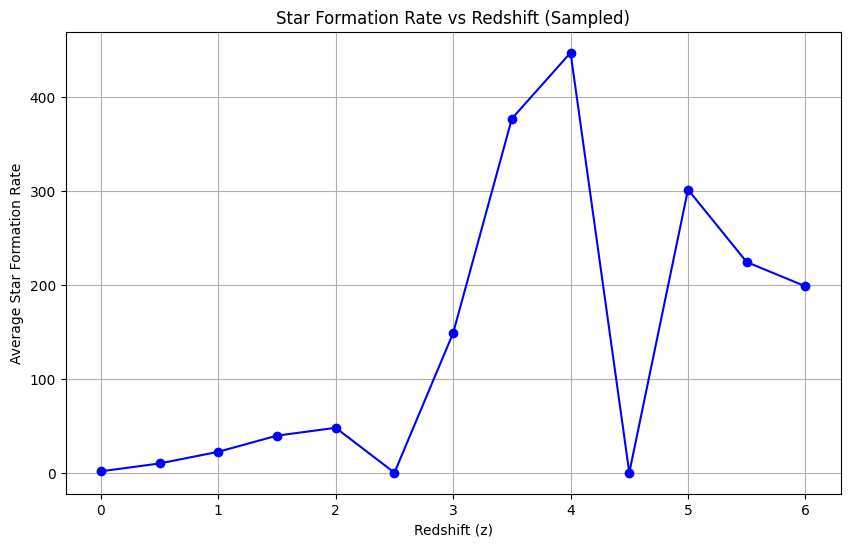

In [65]:
#plotting sfr vs redshift =)
print(sfrData)
plt.figure(figsize=(10, 6))
plt.plot(redshifts, sfrData, marker='o', linestyle='-', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Average Star Formation Rate')
plt.title('Star Formation Rate vs Redshift (Sampled)')
plt.grid(True)
plt.show()